# **Equal-Width Binning**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# UV index data
uv_data = [2, 10, 1, 7, 3, 9, 5, 11, 1, 8, 3, 9, 11, 5, 7]

# Create DataFrame
df_uv = pd.DataFrame({'UV': uv_data})

In [ ]:
# Equal-width binning into 4 bins: Low, Moderate, High, Very High
num_bins = 4
bin_labels = ['Low', 'Moderate', 'High', 'Very High']
# Apply binning
df_uv['UV_Binned'] = pd.cut(df_uv['UV'], bins=num_bins, labels=bin_labels)

# Compute bin edges
#bins = np.linspace(df_uv['UV'].min(), df_uv['UV'].max(), num_bins + 1)
# Apply binning
#df_uv['UV_Level'] = pd.cut(df_uv['UV'], bins=bins, labels=bin_labels)

df_uv.head(15)

,UV,UV_Binned
0,2,Low
1,10,Very High
2,1,Low
3,7,High
4,3,Low
5,9,Very High
6,5,Moderate
7,11,Very High
8,1,Low
9,8,High


# **Quantile Binning**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Humidity data
humidity_data = [15, 95, 10, 98, 18, 90, 25, 80, 95, 40, 20, 30, 85, 92, 12]

# Create DataFrame
df_hm = pd.DataFrame({'Humidity': humidity_data})

In [ ]:
# Equal-frequency binning into 3 bins: Low, Moderate, High
num_bins = 3
bin_labels = ['Low', 'Medium', 'High']
# Apply binning
df_hm['Humidity_Binned'] = pd.qcut(df_hm['Humidity'], q=num_bins, labels=bin_labels)

df_hm.head(15)

,Humidity,Humidity_Binned
0,15,Low
1,95,High
2,10,Low
3,98,High
4,18,Low
5,90,High
6,25,Medium
7,80,Medium
8,95,High
9,40,Medium


# **Custom Binning**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Rainfall Amount data
rainfull_amount = [5, 2, 7, 3, 18, 3, 0, 1, 25, 0, 9, 0, 18, 7, 0]

# Create DataFrame
df_ra = pd.DataFrame({'RainfallAmount': rainfull_amount})

In [ ]:
# Custom binning
bin_labels = ['No Rain', 'Drizzle', 'Rain', 'Heavy Rain']
df_ra['RainAmount_Binned'] = pd.cut(df_ra['RainfallAmount'],
                                 bins=[-np.inf, 2, 4, 15, np.inf], labels=bin_labels)

df_ra.head(15)

,RainfallAmount,RainAmount_Binned
0,5,Rain
1,2,No Rain
2,7,Rain
3,3,Drizzle
4,18,Heavy Rain
5,3,Drizzle
6,0,No Rain
7,1,No Rain
8,25,Heavy Rain
9,0,No Rain


# **Standard Deviation-based Binning**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Temperature data
temperature = [68, 60, 63, 55, 50, 56, 57, 65, 66, 68, 71, 72, 79, 83, 81]

# Create DataFrame
df_temp = pd.DataFrame({'Temperature': temperature})

In [ ]:
#Standard Deviation-based Binning
mean_temp, std_dev = df_temp['Temperature'].mean(), df_temp['Temperature'].std()
bin_edges = [
    float('-inf'),  # Ensure all values are captured
    mean_temp - 2.5 * std_dev,
    mean_temp - 1.5 * std_dev,
    mean_temp - 0.5 * std_dev,
    mean_temp + 0.5 * std_dev,
    mean_temp + 1.5 * std_dev,
    mean_temp + 2.5 * std_dev,
    float('inf')   # Ensure all values are captured
]
df_temp['Temperature_Binned'] = pd.cut(df_temp['Temperature'], bins=bin_edges,
                                       labels=['Very Low', 'Low', 'Below Avg',
                                               'Average','Above Avg', 'High', 'Very High'])

df_temp.head(15)

,Temperature,Temperature_Binned
0,68,Average
1,60,Below Avg
2,63,Average
3,55,Below Avg
4,50,Low
5,56,Below Avg
6,57,Below Avg
7,65,Average
8,66,Average
9,68,Average


# **Binarization**

Original and Binarized Data:
      Glucose  Diabetic_Range  Diabetic_Range_SK
0  109.967142               0                0.0
1  103.617357               0                0.0
2  111.476885               0                0.0
3  120.230299               0                0.0
4  102.658466               0                0.0
5  102.658630               0                0.0
6  120.792128               0                0.0
7  112.674347               0                0.0
8  100.305256               0                0.0
9  110.425600               0                0.0

Distribution after binarization:
Diabetic_Range
0    36
1    14
Name: count, dtype: int64

Percentage in diabetic range: 28.0%


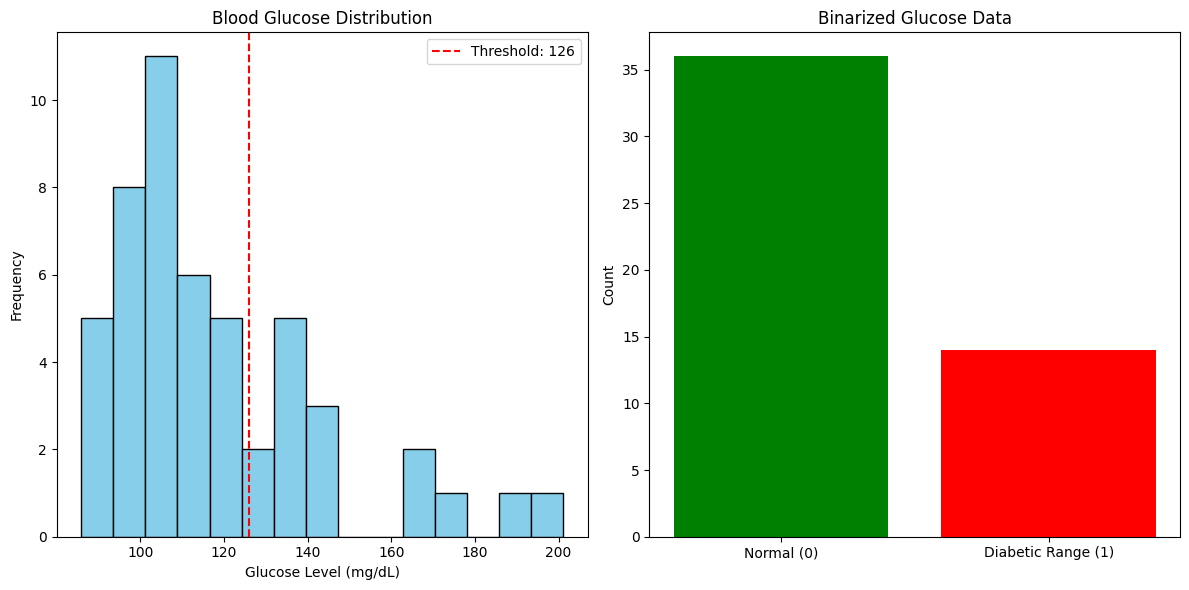


Example 2: Multiple binarization thresholds

Multiple binary indicators:
      Glucose  Normal  Prediabetic  Diabetic
0  109.967142       0            1         0
1  103.617357       0            1         0
2  111.476885       0            1         0
3  120.230299       0            1         0
4  102.658466       0            1         0
5  102.658630       0            1         0
6  120.792128       0            1         0
7  112.674347       0            1         0
8  100.305256       0            1         0
9  110.425600       0            1         0

Distribution across categories:
Normal: 10 patients
Prediabetic: 26 patients
Diabetic: 14 patients


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import Binarizer

# Create sample dataset - blood glucose levels (mg/dL)
np.random.seed(42)
glucose = np.concatenate([
    np.random.normal(105, 10, 30),  # Normal range
    np.random.normal(135, 15, 15),  # Borderline high
    np.random.normal(180, 20, 5)    # High
])

# Create DataFrame
df = pd.DataFrame({'Glucose': glucose})

# Method 1: Simple threshold using Pandas
threshold = 126  # Medical threshold for diabetes diagnosis
df['Diabetic_Range'] = (df['Glucose'] > threshold).astype(int)


Original and Binarized Data:
      Glucose  Diabetic_Range  Diabetic_Range_SK  Normal  Prediabetic  \
0  109.967142               0                0.0       0            1   
1  103.617357               0                0.0       0            1   
2  111.476885               0                0.0       0            1   
3  120.230299               0                0.0       0            1   
4  102.658466               0                0.0       0            1   
5  102.658630               0                0.0       0            1   
6  120.792128               0                0.0       0            1   
7  112.674347               0                0.0       0            1   
8  100.305256               0                0.0       0            1   
9  110.425600               0                0.0       0            1   

   Diabetic  
0         0  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         0  
8         0  
9         0  

Distribution

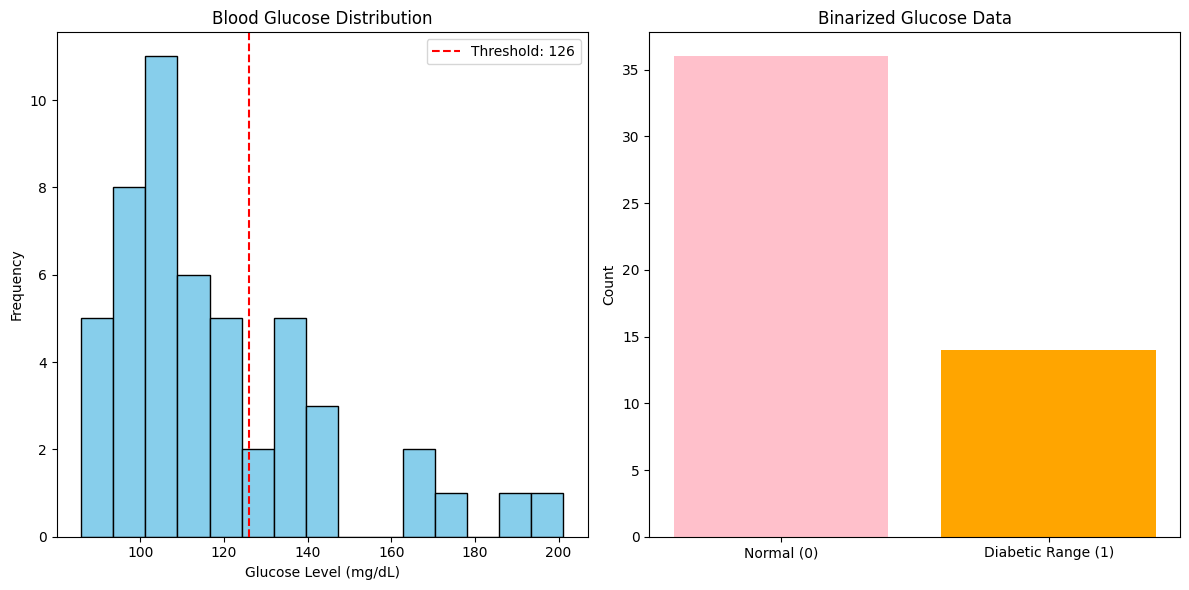


Example 2: Multiple binarization thresholds

Multiple binary indicators:
      Glucose  Normal  Prediabetic  Diabetic
0  109.967142       0            1         0
1  103.617357       0            1         0
2  111.476885       0            1         0
3  120.230299       0            1         0
4  102.658466       0            1         0
5  102.658630       0            1         0
6  120.792128       0            1         0
7  112.674347       0            1         0
8  100.305256       0            1         0
9  110.425600       0            1         0

Distribution across categories:
Normal: 10 patients
Prediabetic: 26 patients
Diabetic: 14 patients


In [ ]:
# Method 2: Using Scikit-learn Binarizer
binarizer = Binarizer(threshold=threshold)
df['Diabetic_Range_SK'] = binarizer.fit_transform(df[['Glucose']])

# Display first few rows
print("Original and Binarized Data:")
print(df.head(10))

# Count values in each category
print("\nDistribution after binarization:")
print(df['Diabetic_Range'].value_counts())

# Calculate percentage
diabetic_pct = (df['Diabetic_Range'].sum() / len(df)) * 100
print(f"\nPercentage in diabetic range: {diabetic_pct:.1f}%")

# Visualization
plt.figure(figsize=(12, 6))

# Original data histogram
plt.subplot(1, 2, 1)
plt.hist(df['Glucose'], bins=15, color='skyblue', edgecolor='black')
plt.axvline(x=threshold, color='red', linestyle='--', label=f'Threshold: {threshold}')
plt.title('Blood Glucose Distribution')
plt.xlabel('Glucose Level (mg/dL)')
plt.ylabel('Frequency')
plt.legend()

# Binarized data
plt.subplot(1, 2, 2)
plt.bar(['Normal (0)', 'Diabetic Range (1)'],
        [len(df[df['Diabetic_Range'] == 0]), len(df[df['Diabetic_Range'] == 1])],
        color=['pink', 'orange'])
plt.title('Binarized Glucose Data')
plt.ylabel('Count')
plt.tight_layout()

plt.show()

# Example 2: Multiple thresholds - creating more complex indicators
print("\nExample 2: Multiple binarization thresholds")

# Create different binary indicators
df['Normal'] = (df['Glucose'] < 100).astype(int)
df['Prediabetic'] = ((df['Glucose'] >= 100) & (df['Glucose'] < 126)).astype(int)
df['Diabetic'] = (df['Glucose'] >= 126).astype(int)

print("\nMultiple binary indicators:")
print(df[['Glucose', 'Normal', 'Prediabetic', 'Diabetic']].head(10))

# Count in each category
print("\nDistribution across categories:")
print(f"Normal: {df['Normal'].sum()} patients")
print(f"Prediabetic: {df['Prediabetic'].sum()} patients")
print(f"Diabetic: {df['Diabetic'].sum()} patients")